In [1]:
import numpy as np
from math import exp
import matplotlib.pyplot as plt
import random

In [2]:
def read_data(fname='./hw3_train.dat'):
    X, Y  = [], []
    with open(fname, 'r') as f:
        for line in f.readlines():
            line = line.split()
            # add coefficient for constant
            X.append(tuple([1] + [float(v) for v in line[:-1]]))
            Y.append(int(line[-1]))
    return np.array(X), np.array(Y)

def sigmoid(s):
    return 1.0/(1.0+exp(-s))
def sign(y):
    if y > 0.0:
        return +1
    else:
        return -1

In [3]:
train_x, train_y = read_data('./hw3_train.dat')
test_x, test_y = read_data('./hw3_test.dat')

In [15]:
def GD(w, X, Y):
    sample_size = len(Y)
    gradient = 0.0
    for x, y in zip(X,Y):
        gradient += sigmoid(-y * x.dot(w)) * y * x
    return gradient/float(sample_size)

In [16]:
def SGD(w, x, y):
    return sigmoid(-y * x.dot(w)) * y * x

In [21]:
def cnt_err(w, X, Y):
    err = 0.0
    for i in range(len(X)):
        pred = np.sign(sigmoid(X[i].dot(w))-1/2)
        if pred != Y[i]:
            err = err + 1
    return err/float(len(X))

In [56]:
sample_size = len(train_x)
dim_w = len(train_x[0])

#### eta = 0.01
w_GD = np.zeros(dim_w)
w_SGD = np.zeros(dim_w)

eta = 0.01
iter_times = 2000
ein_GD = []
eout_GD = []
ein_SGD = []
eout_SGD = []

for i in range(iter_times):
    sgd_idx = random.randint(0, sample_size-1)
    x, y = train_x[sgd_idx], train_y[sgd_idx]
    w_GD = w_GD + eta * GD(w_GD, train_x, train_y)
    w_SGD = w_SGD + eta * SGD(w_SGD, x, y)
    
    ein_GD.append(cnt_err(w_GD, train_x, train_y))
    eout_GD.append(cnt_err(w_GD, test_x, test_y))
    ein_SGD.append(cnt_err(w_SGD, train_x, train_y))
    eout_SGD.append(cnt_err(w_SGD, test_x, test_y))

#### eta = 0.001    
w_GD2 = np.zeros(dim_w)
w_SGD2 = np.zeros(dim_w)

eta = 0.001
iter_times = 2000
ein_GD2 = []
eout_GD2 = []
ein_SGD2 = []
eout_SGD2 = []

for i in range(iter_times):
    sgd_idx = random.randint(0, sample_size-1)
    x, y = train_x[sgd_idx], train_y[sgd_idx]
    w_GD2 = w_GD2 + eta * GD(w_GD2, train_x, train_y)
    w_SGD2 = w_SGD2 + eta * SGD(w_SGD2, x, y)
    
    ein_GD2.append(cnt_err(w_GD2, train_x, train_y))
    eout_GD2.append(cnt_err(w_GD2, test_x, test_y))
    ein_SGD2.append(cnt_err(w_SGD2, train_x, train_y))
    eout_SGD2.append(cnt_err(w_SGD2, test_x, test_y))

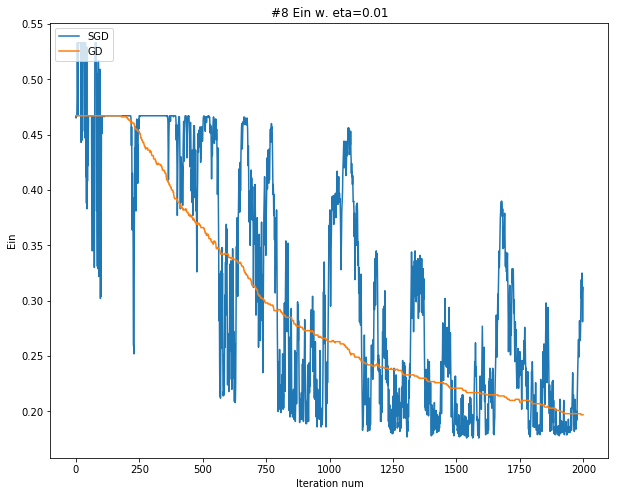

In [57]:
plt.figure(figsize=(10,8)) 
t = np.arange(0, iter_times, 1)
plt.plot(t, ein_SGD, label='SGD')
plt.plot(t, ein_GD, label='GD')
plt.legend(loc=2)
plt.title("#8 Ein w. eta=0.01")
plt.xlabel('Iteration num') 
plt.ylabel('Ein')
plt.show()

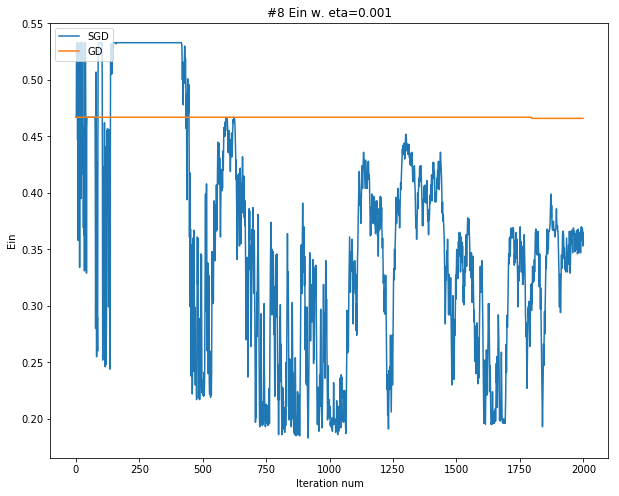

In [58]:
plt.figure(figsize=(10,8)) 
t = np.arange(0, iter_times, 1)
plt.plot(t, ein_SGD2, label='SGD')
plt.plot(t, ein_GD2, label='GD')
plt.legend(loc=2)
plt.title("#8 Ein w. eta=0.001")
plt.xlabel('Iteration num') 
plt.ylabel('Ein')
plt.show()

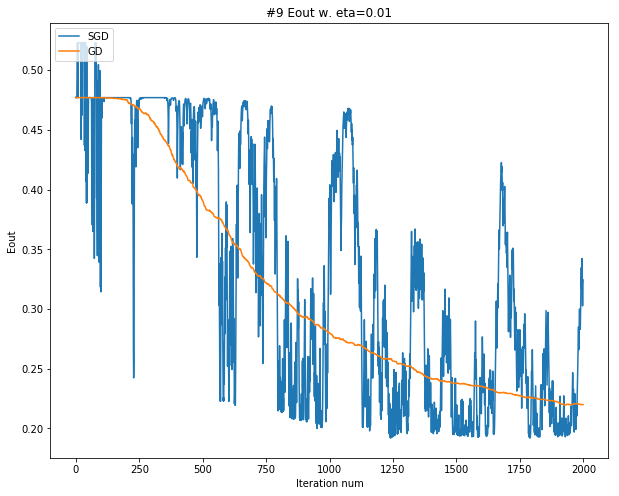

In [59]:
plt.figure(figsize=(10,8)) 
t = np.arange(0, iter_times, 1)
plt.plot(t, eout_SGD, label='SGD')
plt.plot(t, eout_GD, label='GD')
plt.legend(loc=2)
plt.title("#9 Eout w. eta=0.01")
plt.xlabel('Iteration num') 
plt.ylabel('Eout')
plt.show()

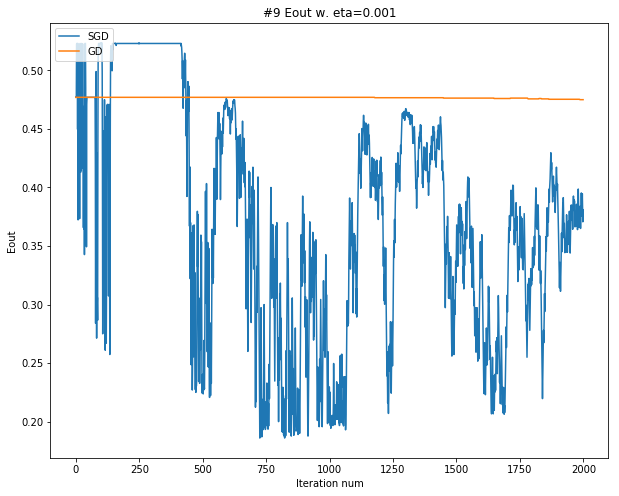

In [60]:
plt.figure(figsize=(10,8)) 
t = np.arange(0, iter_times, 1)
plt.plot(t, eout_SGD2, label='SGD')
plt.plot(t, eout_GD2, label='GD')
plt.legend(loc=2)
plt.title("#9 Eout w. eta=0.001")
plt.xlabel('Iteration num') 
plt.ylabel('Eout')
plt.show()